In [12]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/ARC_heuristic/PlotsPaper/')
print(os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1b0U2fABpE8D898NvKTrvvqqusm1peAQH/ARC_heuristic/PlotsPaper


final values (0.8248987854251012,0.83008300830083), (0.9121212121212121,0.8487246698255873), (0.9305555555555556,0.9167425852819111), (0.9483805668016194,0.7912087912087913)


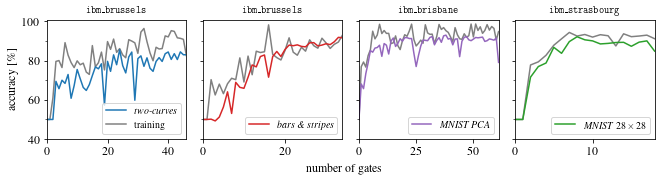

In [4]:
# PlotAcc_paper.py
import numpy as np
import pylab as plt
from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec
from matplotlib.path import Path
import matplotlib.colors
import array
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator


import matplotlib as mpl

mpl.rcParams.update({'text.usetex':True,'font.size': 12, 'font.family': 'serif', 'font.serif': ['Times', 'Computer Modern']})


#import seaborn as sns

def readGate(gateFile,cutoff='nan'):
	qubit = []	#id of the used qubit
	weight = []	#weight by which the angle is rotated
	layer = []	#in which layer a gate is occupied (important for gates that act on two qubits)
	gateData = open(gateFile,'r')
	layer_collect = 1
	count = 0
	for data in gateData:
		if count == cutoff:
			break
		line = data.split('\t')
		for l in range(len(line)-2):
			if line[l] == '111111': pass
			else:
				qubit.append(l)
				layer.append(layer_collect)
				weight.append(float(line[-2]))
				if line[l] == 'Rxx_x' or line[l] == 'Ryy_x' or line[l] == 'Rzz_x':
					qubit.append(l-1)
					layer.append(layer_collect)
					weight.append(float(line[-2]))
				layer_collect+=1
		if cutoff == 'nan': pass
		else:count+=1
	return [qubit,weight,layer]

def read_acc_scores(data_path, idx_group=0):
	idx_0 = idx_group*group_len
	idx_1 = idx_group*group_len + 1
	idx_avg = idx_group*group_len + 3
	idx_loss = idx_group*group_len + 4
	test0 = np.genfromtxt(data_path+'ACC.txt',usecols=idx_0,skip_header=1)
	test1 = np.genfromtxt(data_path+'ACC.txt',usecols=idx_1,skip_header=1)
	testavg = np.genfromtxt(data_path+'ACC.txt',usecols=idx_avg,skip_header=1)
	loss = np.genfromtxt(data_path+'ACC.txt',usecols=idx_loss,skip_header=1)
	assert np.allclose(testavg, (test0 + test1) / 2)
	test0 = np.array([0.5,*test0])
	test1 = np.array([0.5,*test1])
	loss = np.array([0.0,*loss])
	return [test0,test1,(test0+test1)*0.5, loss]

def read_reconstruction_scores(data_path):
	headers = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
	start_col_idx = group_len*len(idx_groups)
	headers = headers[start_col_idx:]
	scores = np.genfromtxt(data_path+'ACC.txt',usecols=range(start_col_idx,start_col_idx+len(headers)),skip_header=1)
 # pad with leading np.nan
	scores = np.insert(scores,len(scores),np.nan,axis=0)
	return dict(zip(headers,scores.T))


group_len = 5
idx_groups = {
		 'sim': 0,
		 'sim_tr': 1,
		 'ibm': 2,
		 'ibm_tr': 3,
		 'mini': 4,
		 'mini_tr': 5,
}

#import data

#two-curves
path = 'Data_QNN/IBM_TC/'
twoCurves = read_acc_scores(path, idx_group=idx_groups['ibm'])
twoCurves_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
twoCurves_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
twoCurves_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
twoCurves_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
twoCurves_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
twoCurves_qubit,twoCurves_weight,twoCurves_layer = readGate(path+'Gate.txt','nan')
twoCurvesRec = read_reconstruction_scores(path)
headers = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)

#bars-stripes
path = 'Data_QNN/IBM_BS/'
barsStripes = read_acc_scores(path, idx_group=idx_groups['ibm'])
barsStripes_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
barsStripes_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
barsStripes_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
barsStripes_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
barsStripes_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
barsStripes_qubit,barsStripes_weight,barsStripes_layer = readGate(path+'Gate.txt','nan')
barsStripesRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)

#mnist-pca
path = 'Data_QNN/IBM_MN/'
mnistPca = read_acc_scores(path, idx_group=idx_groups['ibm'])
mnistPca_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
mnistPca_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
mnistPca_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
mnistPca_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
mnistPca_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
mnistPca_qubit,mnistPca_weight,mnistPca_layer = readGate(path+'Gate.txt','nan')
mnistPcaRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)

#mnist-full-res
path = 'Data_QNN/IBM_MN_noPCA/'
mnistNoPca = read_acc_scores(path, idx_group=idx_groups['ibm'])
mnistNoPca_train = read_acc_scores(path, idx_group=idx_groups['ibm_tr'])
mnistNoPca_sim = read_acc_scores(path, idx_group=idx_groups['sim'])
mnistNoPca_sim_train = read_acc_scores(path, idx_group=idx_groups['sim_tr'])
mnistNoPca_mini = read_acc_scores(path, idx_group=idx_groups['mini'])
mnistNoPca_mini_train = read_acc_scores(path, idx_group=idx_groups['mini_tr'])
mnistNoPca_qubit,mnistNoPca_weight,mnistNoPca_layer = readGate(path+'Gate.txt','nan')
mnistNoPcaRec = read_reconstruction_scores(path)
headers_ = np.genfromtxt(path+'ACC.txt',dtype='str',max_rows=1, skip_header=0)
assert np.array_equal(headers,headers_)


# IMPORTANT: MNIST noPCA will be plot in ax2 but ax2 will be displayed in the last column


fig = plt.figure(figsize = (11.69*0.8,8.27*0.45*8/11+0.065))
gs = gridspec.GridSpec(1,4, height_ratios=[1])#,height_ratios=[2,0.75])
#gs = gridspec.GridSpec(2,4,height_ratios=[8,3])


ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[3],sharey=ax1)  # swap ax2 to the end
ax3 = plt.subplot(gs[1],sharey=ax1)
ax4 = plt.subplot(gs[2],sharey=ax1)
#ax5 = plt.subplot(gs[4],sharex=ax1)
#ax6 = plt.subplot(gs[7],sharex=ax2,sharey=ax5)
#ax7 = plt.subplot(gs[5],sharex=ax3,sharey=ax5)
#ax8 = plt.subplot(gs[6],sharex=ax4,sharey=ax5)
#ax9 = plt.subplot(gs[8],sharex=ax5)
#ax10 = plt.subplot(gs[11],sharex=ax6,sharey=ax9)
#ax11 = plt.subplot(gs[9],sharex=ax7,sharey=ax9)
#ax12 = plt.subplot(gs[10],sharex=ax8,sharey=ax9)

ax = [[ax1,ax2,ax3,ax4]#,[ax5,ax6,ax7,ax8], #[ax9, ax10, ax11, ax12]
      ]


ax1.set_title('$\\mathtt{ibm\\_brussels}$', fontsize=10)
ax2.set_title('$\\mathtt{ibm\\_strasbourg}$', fontsize=10)
ax3.set_title('$\\mathtt{ibm\\_brussels}$', fontsize=10)
ax4.set_title('$\\mathtt{ibm\\_brisbane}$', fontsize=10)


############ ACCURACY PLOTS ############

# plot test
ax1.plot(np.linspace(0,len(twoCurves[2])-1,len(twoCurves[2])),twoCurves[2]*100,
	'-',color='tab:blue',zorder=1,label=r'\textit{two-curves}')#,fillstyle='none')
ax2.plot(np.linspace(0,len(mnistNoPca[2])-1,len(mnistNoPca[2])),mnistNoPca[2]*100,
	'-',color='tab:green',zorder=1,label=r'\textit{MNIST} $28\times 28$')#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes[2])-1,len(barsStripes[2])),barsStripes[2]*100,
	'-',color='tab:red',zorder=1,label=r'\textit{bars \& stripes}')#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca[2])-1,len(mnistPca[2])),mnistPca[2]*100,
	'-',color='tab:purple',zorder=1,label=r'\textit{MNIST PCA}')#,fillstyle='none')


# plot train
ax1.plot(np.linspace(0,len(twoCurves_train[2])-1,len(twoCurves_train[2])),twoCurves_train[2]*100,
	'-',label='training',color='grey',zorder=0)#,fillstyle='none')
ax2.plot(np.linspace(0,len(mnistNoPca_train[2])-1,len(mnistNoPca_train[2])),mnistNoPca_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax3.plot(np.linspace(0,len(barsStripes_train[2])-1,len(barsStripes_train[2])),barsStripes_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')
ax4.plot(np.linspace(0,len(mnistPca_train[2])-1,len(mnistPca_train[2])),mnistPca_train[2]*100,
	'-',color='grey',zorder=0)#,fillstyle='none')




############ LOSS PLOTS ############
# plot test
'''ax5.plot(np.linspace(0,len(twoCurves[3])-1,len(twoCurves[3])),twoCurves[3],
	'-',color='tab:blue',zorder=1)#,fillstyle='none')
ax6.plot(np.linspace(0,len(mnistNoPca[3])-1,len(mnistNoPca[3])),mnistNoPca[3],
	'-',color='tab:green',zorder=1,label=r'\textit{MNIST} $28\times 28$')
ax7.plot(np.linspace(0,len(barsStripes[3])-1,len(barsStripes[3])),barsStripes[3],
	'-',color='tab:red',zorder=1,label=r'\textit{bars \& stripes}')
ax8.plot(np.linspace(0,len(mnistPca[3])-1,len(mnistPca[3])),mnistPca[3],
	'-',color='tab:purple',zorder=1,label=r'\textit{MNIST PCA}')



# extra results
ax5.plot(np.linspace(0,len(twoCurves_sim[3])-1,len(twoCurves_sim[3])),twoCurves_sim[3],
	'--',color='tab:blue',zorder=5,label='ideal, full train')
ax6.plot(np.linspace(0,len(mnistNoPca_sim[3])-1,len(mnistNoPca_sim[3])),mnistNoPca_sim[3],
	'--',color='tab:green',zorder=5)
ax7.plot(np.linspace(0,len(barsStripes_sim[3])-1,len(barsStripes_sim[3])),barsStripes_sim[3],
	'--',color='tab:red',zorder=5)
ax8.plot(np.linspace(0,len(mnistPca_sim[3])-1,len(mnistPca_sim[3])),mnistPca_sim[3],
	'--',color='tab:purple',zorder=5)

# plot train
ax5.plot(np.linspace(0,len(twoCurves_train[3])-1,len(twoCurves_train[3])),twoCurves_train[3],
	'-',color='grey',zorder=0)
ax6.plot(np.linspace(0,len(mnistNoPca_train[3])-1,len(mnistNoPca_train[3])),mnistNoPca_train[3],
	'-',color='grey',zorder=0)
ax7.plot(np.linspace(0,len(barsStripes_train[3])-1,len(barsStripes_train[3])),barsStripes_train[3],
	'-',color='grey',zorder=0)
ax8.plot(np.linspace(0,len(mnistPca_train[3])-1,len(mnistPca_train[3])),mnistPca_train[3],
	'-',color='grey',zorder=0)'''


print(f'final values ({twoCurves_train[2][-1]},{twoCurves[2][-1]}), ({mnistNoPca_train[2][-1]},{mnistNoPca[2][-1]}), ({barsStripes_train[2][-1]},{barsStripes[2][-1]}), ({mnistPca_train[2][-1]},{mnistPca[2][-1]})')



cvals = [min(twoCurves_weight),max(twoCurves_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:blue']))
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(mnistNoPca_weight),max(mnistNoPca_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:green']))
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(barsStripes_weight),max(barsStripes_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:red']))
cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

cvals = [min(mnistPca_weight),max(mnistPca_weight)]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals),['black','tab:purple']))
cmap4 = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)





ax1.set_ylim(0.4*100,1.01*100)
ax2.set_ylim(0.4*100,1.01*100)
ax3.set_ylim(0.4*100,1.01*100)
ax4.set_ylim(0.4*100,1.01*100)

ax1.set_xlim(0,len(twoCurves[2])-1)
ax2.set_xlim(0,len(mnistNoPca[2])-1)
ax3.set_xlim(0,len(barsStripes[2])-1)
ax4.set_xlim(0,len(mnistPca[2])-1)


ax1.set_ylabel(r'accuracy [\%]')
#ax5.set_ylabel(r'Loss $L_{\rm log}$')

#ax1.tick_params(labelbottom = False)
ax2.tick_params(labelleft = False)# ,labelbottom = False)
ax3.tick_params(labelleft = False)# ,labelbottom = False)
ax4.tick_params(labelleft = False)# ,labelbottom = False)
#ax6.tick_params(labelleft = False)
#ax7.tick_params(labelleft = False)
#ax8.tick_params(labelleft = False)


#ax5.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


lines_labels = [ax1.get_legend_handles_labels(),
	ax2.get_legend_handles_labels(),
	ax3.get_legend_handles_labels(),
	ax4.get_legend_handles_labels(),]
#	ax5.get_legend_handles_labels(),]
lines,labels = [sum(lol, []) for lol in zip(*lines_labels)]


fig.supxlabel('number of gates',y=0.093,x=0.52,fontsize='medium')


ax1.legend(loc='lower right',fontsize='small')
ax2.legend(loc='lower right',fontsize='small')
ax3.legend(loc='lower right',fontsize='small')
ax4.legend(loc='lower right',fontsize='small')
#ax5.legend(loc='lower right',fontsize='small')


ax1.yaxis.set_minor_locator(AutoMinorLocator(n=2))




fig.align_ylabels(np.asarray(ax)[:, 0])

plt.tight_layout()
plt.savefig('Acc_IBM_paper.pdf')
plt.show()

In [14]:

print(twoCurvesRec['RMSE_mean'] - twoCurvesRec['RMSE_mean_raw'])
print(barsStripesRec['RMSE_mean'] - barsStripesRec['RMSE_mean_raw'])
print(mnistPcaRec['RMSE_mean'] - mnistPcaRec['RMSE_mean_raw'])
print(mnistNoPcaRec['RMSE_mean'] - mnistNoPcaRec['RMSE_mean_raw'])

[-0.05551082 -0.02715602 -0.01502864 -0.03923417 -0.03538232 -0.03918633
 -0.04179587 -0.03744791 -0.03149444 -0.02730936 -0.04086401 -0.04721397
 -0.03286463 -0.02988426 -0.04586232 -0.04122441 -0.03259855 -0.03576199
 -0.02852771 -0.05918092 -0.04494729 -0.03198458 -0.04970695 -0.06442327
 -0.03759803 -0.03582235 -0.04239007 -0.04831089 -0.05934769 -0.06958187
 -0.0613505  -0.04109255 -0.04611965 -0.0304337  -0.03842734 -0.05915364
 -0.04277578 -0.0401231  -0.03589116 -0.04031755 -0.03643114 -0.03345169
 -0.01533827 -0.02137512 -0.04014086 -0.03516718         nan]
[-0.0540907  -0.02975747 -0.03147445 -0.03969861 -0.05394826 -0.04280824
 -0.05365749 -0.06934208 -0.0581207  -0.08665381 -0.06673217 -0.05495585
 -0.07241647 -0.05629704 -0.05159802 -0.05275293 -0.06339409 -0.0420681
 -0.04601141 -0.02741188 -0.01405448 -0.01804303 -0.01314713 -0.01005824
 -0.01655222 -0.02213878 -0.01190764 -0.01168649 -0.011678   -0.01081615
 -0.01353521 -0.0152968  -0.00779328 -0.01057228         nan]
[

In [15]:
twoCurvesRec['RMSE_mean'][1:][10:14]

array([0.35526292, 0.38701138, 0.41796552, 0.41638434])

In [16]:
datasets = {
    'two curves': twoCurves,
    'bars & stripes': barsStripes,
    'MNIST PCA': mnistPca,
    'MNIST 28x28': mnistNoPca,
}

max_accuracies = {}
for name, data in datasets.items():
    max_accuracy = np.max(data[2])  # data[2] is the test accuracy
    max_index = np.argmax(data[2])
    num_gates = max_index  # Assuming index corresponds to number of gates
    max_accuracies[name] = (max_accuracy * 100, num_gates) # Convert to percentage and store gate count
    print(name, data[2])

print("Maximum Test Accuracies and Corresponding Number of Gates:")
for name, (accuracy, gates) in max_accuracies.items():
    print(f"{name}: {accuracy:.2f}% at {gates} gates")

two curves [0.5        0.5        0.5        0.69451945 0.6569657  0.70027003
 0.6840184  0.72947295 0.60811081 0.67261726 0.7550255  0.70787079
 0.66331633 0.64816482 0.67776778 0.72392239 0.76807681 0.75837584
 0.78412841 0.57315732 0.79652965 0.74552455 0.82958296 0.77937794
 0.8560356  0.77482748 0.73747375 0.81938194 0.8440344  0.5980098
 0.81038104 0.82453245 0.77107711 0.81453145 0.76147615 0.74542454
 0.79622962 0.81563156 0.7960296  0.83543354 0.84433443 0.80643064
 0.83563356 0.80583058 0.84483448 0.83018302 0.83008301]
bars & stripes [0.5        0.5        0.50156898 0.49255998 0.51229882 0.56372102
 0.64100617 0.53062051 0.68944225 0.66383237 0.65897358 0.71545703
 0.77821642 0.76839761 0.82103452 0.82903128 0.71565948 0.82108513
 0.8470493  0.82123697 0.85701994 0.87959308 0.87625266 0.88070655
 0.87281101 0.87053345 0.89093026 0.89204373 0.87524041 0.87954246
 0.88647636 0.88197186 0.8963964  0.91902014 0.91674259]
MNIST PCA [0.5        0.68111705 0.65722351 0.734197   0.